In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import koreanize_matplotlib
from sklearn.ensemble import RandomForestRegressor

In [2]:
submission = pd.read_csv('./235743_구내식당 식사 인원 예측 AI 경진대회_data/sample_submission.csv')

In [3]:
train = pd.read_csv("./235743_구내식당 식사 인원 예측 AI 경진대회_data/train.csv")
test = pd.read_csv("./235743_구내식당 식사 인원 예측 AI 경진대회_data/test.csv")

print(train.shape,test.shape)

train.head(5)

(1205, 12) (50, 10)


,일자,요일,본사정원수,본사휴가자수,본사출장자수,본사시간외근무명령서승인건수,현본사소속재택근무자수,조식메뉴,중식메뉴,석식메뉴,중식계,석식계
0,2016-02-01,월,2601,50,150,238,0.0,모닝롤/찐빵 우유/두유/주스 계란후라이 호두죽/쌀밥 (쌀:국내산) 된장찌개 쥐...,"쌀밥/잡곡밥 (쌀,현미흑미:국내산) 오징어찌개 쇠불고기 (쇠고기:호주산) 계란찜 ...","쌀밥/잡곡밥 (쌀,현미흑미:국내산) 육개장 자반고등어구이 두부조림 건파래무침 ...",1039.0,331.0
1,2016-02-02,화,2601,50,173,319,0.0,모닝롤/단호박샌드 우유/두유/주스 계란후라이 팥죽/쌀밥 (쌀:국내산) 호박젓국찌...,"쌀밥/잡곡밥 (쌀,현미흑미:국내산) 김치찌개 가자미튀김 모둠소세지구이 마늘쫑무...","콩나물밥*양념장 (쌀,현미흑미:국내산) 어묵국 유산슬 (쇠고기:호주산) 아삭고추무...",867.0,560.0
2,2016-02-03,수,2601,56,180,111,0.0,모닝롤/베이글 우유/두유/주스 계란후라이 표고버섯죽/쌀밥 (쌀:국내산) 콩나물국...,"카레덮밥 (쌀,현미흑미:국내산) 팽이장국 치킨핑거 (닭고기:국내산) 쫄면야채무침 ...","쌀밥/잡곡밥 (쌀,현미흑미:국내산) 청국장찌개 황태양념구이 (황태:러시아산) 고기...",1017.0,573.0
3,2016-02-04,목,2601,104,220,355,0.0,"모닝롤/토마토샌드 우유/두유/주스 계란후라이 닭죽/쌀밥 (쌀,닭:국내산) 근대국...","쌀밥/잡곡밥 (쌀,현미흑미:국내산) 쇠고기무국 주꾸미볶음 부추전 시금치나물 ...","미니김밥*겨자장 (쌀,현미흑미:국내산) 우동 멕시칸샐러드 군고구마 무피클 포...",978.0,525.0
4,2016-02-05,금,2601,278,181,34,0.0,모닝롤/와플 우유/두유/주스 계란후라이 쇠고기죽/쌀밥 (쌀:국내산) 재첩국 방...,"쌀밥/잡곡밥 (쌀,현미흑미:국내산) 떡국 돈육씨앗강정 (돼지고기:국내산) 우엉잡채...","쌀밥/잡곡밥 (쌀,현미흑미:국내산) 차돌박이찌개 (쇠고기:호주산) 닭갈비 (닭고기:...",925.0,330.0


In [4]:
test.head(5)

,일자,요일,본사정원수,본사휴가자수,본사출장자수,본사시간외근무명령서승인건수,현본사소속재택근무자수,조식메뉴,중식메뉴,석식메뉴
0,2021-01-27,수,2983,88,182,5,358.0,모닝롤/연유버터베이글 우유/주스 계란후라이/찐계란 단호박죽/흑미밥 우거지국 고기완자...,쌀밥/흑미밥/찰현미밥 대구지리 매운돈갈비찜 오꼬노미계란말이 상추무침 포기김치 양상추...,흑미밥 얼큰순두부찌개 쇠고기우엉볶음 버섯햄볶음 (New)아삭이고추무절임 포기김치
1,2021-01-28,목,2983,104,212,409,348.0,모닝롤/대만샌드위치 우유/주스 계란후라이/찐계란 누룽지탕/흑미밥 황태국 시래기지짐 ...,쌀밥/보리밥/찰현미밥 우렁된장찌개 오리주물럭 청양부추전 수제삼색무쌈 겉절이김치 양상...,충무김밥 우동국물 오징어무침 꽃맛살샐러드 얼갈이쌈장무침 석박지
2,2021-01-29,금,2983,270,249,0,294.0,모닝롤/핫케익 우유/주스 계란후라이/찐계란 오곡죽/흑미밥 매생이굴국 고구마순볶음 양...,쌀밥/흑미밥/찰현미밥 팽이장국 수제돈까스*소스 가자미조림 동초나물무침 포기김치 양상...,흑미밥 물만둣국 카레찜닭 숯불양념꼬지어묵 꼬시래기무침 포기김치
3,2021-02-01,월,2924,108,154,538,322.0,모닝롤/촉촉한치즈케익 우유/주스 계란후라이/찐계란 누룽지탕/흑미밥 두부김칫국 새우완...,쌀밥/흑미밥/찰현미밥 배추들깨국 오리대패불고기 시금치프리타타 부추고추장무침 포기김치...,흑미밥 동태탕 돈육꽈리고추장조림 당면채소무침 모자반무침 포기김치
4,2021-02-02,화,2924,62,186,455,314.0,모닝롤/토마토샌드 우유/주스 계란후라이/찐계란 채소죽/흑미밥 호박맑은국 오이생채 양...,쌀밥/팥밥/찰현미밥 부대찌개 닭살데리야끼조림 버섯탕수 세발나물무침 알타리김치/사과푸...,흑미밥 바지락살국 쇠고기청경채볶음 두부구이*볶은김치 머위된장무침 백김치


In [5]:
submission.head()

,일자,중식계,석식계
0,2021-01-27,0,0
1,2021-01-28,0,0
2,2021-01-29,0,0
3,2021-02-01,0,0
4,2021-02-02,0,0


In [6]:
submission.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   일자      50 non-null     object
 1   중식계     50 non-null     int64 
 2   석식계     50 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 1.3+ KB


In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1205 entries, 0 to 1204
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   일자              1205 non-null   object 
 1   요일              1205 non-null   object 
 2   본사정원수           1205 non-null   int64  
 3   본사휴가자수          1205 non-null   int64  
 4   본사출장자수          1205 non-null   int64  
 5   본사시간외근무명령서승인건수  1205 non-null   int64  
 6   현본사소속재택근무자수     1205 non-null   float64
 7   조식메뉴            1205 non-null   object 
 8   중식메뉴            1205 non-null   object 
 9   석식메뉴            1205 non-null   object 
 10  중식계             1205 non-null   float64
 11  석식계             1205 non-null   float64
dtypes: float64(3), int64(4), object(5)
memory usage: 113.1+ KB


In [8]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   일자              50 non-null     object 
 1   요일              50 non-null     object 
 2   본사정원수           50 non-null     int64  
 3   본사휴가자수          50 non-null     int64  
 4   본사출장자수          50 non-null     int64  
 5   본사시간외근무명령서승인건수  50 non-null     int64  
 6   현본사소속재택근무자수     50 non-null     float64
 7   조식메뉴            50 non-null     object 
 8   중식메뉴            50 non-null     object 
 9   석식메뉴            50 non-null     object 
dtypes: float64(1), int64(4), object(5)
memory usage: 4.0+ KB


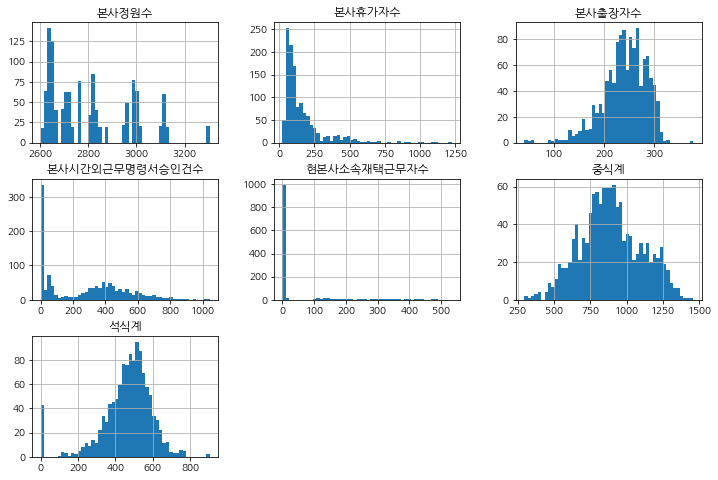

In [9]:
train.hist(figsize = (12,8), bins = 50);

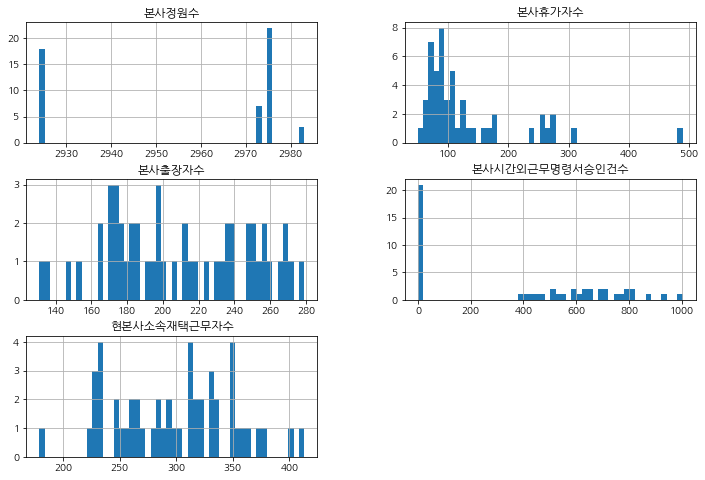

In [10]:
test.hist(figsize = (12,8),bins = 50);

In [11]:
train.isnull().sum().sum()

0

In [12]:
test.isnull().sum().sum()

0

In [13]:
train.columns

Index(['일자', '요일', '본사정원수', '본사휴가자수', '본사출장자수', '본사시간외근무명령서승인건수',
       '현본사소속재택근무자수', '조식메뉴', '중식메뉴', '석식메뉴', '중식계', '석식계'],
      dtype='object')

In [14]:
train['요일'] = train['요일'].map({'월':0, '화':1, '수':2, '목':3, '금':4})
test['요일'] = test['요일'].map({'월':0, '화':1, '수':2, '목':3, '금':4})

In [15]:
train["년"] = train["일자"].map(lambda x : x.split("-")[0])
train["월"] = train["일자"].map(lambda x : x.split("-")[1])

In [16]:
test["년"] = test["일자"].map(lambda x : x.split("-")[0])
test["월"] = test["일자"].map(lambda x : x.split("-")[1])

In [17]:
train["년"].value_counts()

2019    246
2017    244
2018    239
2020    232
2016    227
2021     17
Name: 년, dtype: int64

In [18]:
train["월"].value_counts()

07    110
11    108
03    107
08    107
04    103
12    101
01    101
05     99
09     94
02     93
10     92
06     90
Name: 월, dtype: int64

본사정원수	본사휴가자수	본사출장자수	본사시간외근무명령서승인건수	현본사소속재택근무자수

In [19]:
train["식사가능한자"] = (train["본사정원수"] - train["본사휴가자수"] - train["본사출장자수"] - train["본사시간외근무명령서승인건수"] -train["현본사소속재택근무자수"])

In [20]:
test["식사가능한자"] = (test["본사정원수"] - test["본사휴가자수"] - test["본사출장자수"] - test["본사시간외근무명령서승인건수"] -test["현본사소속재택근무자수"])

In [21]:
train["빵"] = train["조식메뉴"].map(lambda x : x.split("/")[0].split(" ")[0].strip())
test["빵"] = test["조식메뉴"].map(lambda x : x.split("/")[0].split(" ")[0].strip())

In [22]:
train["중식밥"] = train["중식메뉴"].map(lambda x : x.split("/")[0].split(" ")[0].strip())
test["중식밥"] = test["중식메뉴"].map(lambda x : x.split("/")[0].split(" ")[0].strip())

In [23]:
train["석식밥"] = train["석식메뉴"].map(lambda x : x.split("/")[0].split(" ")[0].strip())
test["석식밥"] = test["석식메뉴"].map(lambda x : x.split("/")[0].split(" ")[0].strip())

In [24]:
train.head()

,일자,요일,본사정원수,본사휴가자수,본사출장자수,본사시간외근무명령서승인건수,현본사소속재택근무자수,조식메뉴,중식메뉴,석식메뉴,중식계,석식계,년,월,식사가능한자,빵,중식밥,석식밥
0,2016-02-01,0,2601,50,150,238,0.0,모닝롤/찐빵 우유/두유/주스 계란후라이 호두죽/쌀밥 (쌀:국내산) 된장찌개 쥐...,"쌀밥/잡곡밥 (쌀,현미흑미:국내산) 오징어찌개 쇠불고기 (쇠고기:호주산) 계란찜 ...","쌀밥/잡곡밥 (쌀,현미흑미:국내산) 육개장 자반고등어구이 두부조림 건파래무침 ...",1039.0,331.0,2016,02,2163.0,모닝롤,쌀밥,쌀밥
1,2016-02-02,1,2601,50,173,319,0.0,모닝롤/단호박샌드 우유/두유/주스 계란후라이 팥죽/쌀밥 (쌀:국내산) 호박젓국찌...,"쌀밥/잡곡밥 (쌀,현미흑미:국내산) 김치찌개 가자미튀김 모둠소세지구이 마늘쫑무...","콩나물밥*양념장 (쌀,현미흑미:국내산) 어묵국 유산슬 (쇠고기:호주산) 아삭고추무...",867.0,560.0,2016,02,2059.0,모닝롤,쌀밥,콩나물밥*양념장
2,2016-02-03,2,2601,56,180,111,0.0,모닝롤/베이글 우유/두유/주스 계란후라이 표고버섯죽/쌀밥 (쌀:국내산) 콩나물국...,"카레덮밥 (쌀,현미흑미:국내산) 팽이장국 치킨핑거 (닭고기:국내산) 쫄면야채무침 ...","쌀밥/잡곡밥 (쌀,현미흑미:국내산) 청국장찌개 황태양념구이 (황태:러시아산) 고기...",1017.0,573.0,2016,02,2254.0,모닝롤,카레덮밥,쌀밥
3,2016-02-04,3,2601,104,220,355,0.0,"모닝롤/토마토샌드 우유/두유/주스 계란후라이 닭죽/쌀밥 (쌀,닭:국내산) 근대국...","쌀밥/잡곡밥 (쌀,현미흑미:국내산) 쇠고기무국 주꾸미볶음 부추전 시금치나물 ...","미니김밥*겨자장 (쌀,현미흑미:국내산) 우동 멕시칸샐러드 군고구마 무피클 포...",978.0,525.0,2016,02,1922.0,모닝롤,쌀밥,미니김밥*겨자장
4,2016-02-05,4,2601,278,181,34,0.0,모닝롤/와플 우유/두유/주스 계란후라이 쇠고기죽/쌀밥 (쌀:국내산) 재첩국 방...,"쌀밥/잡곡밥 (쌀,현미흑미:국내산) 떡국 돈육씨앗강정 (돼지고기:국내산) 우엉잡채...","쌀밥/잡곡밥 (쌀,현미흑미:국내산) 차돌박이찌개 (쇠고기:호주산) 닭갈비 (닭고기:...",925.0,330.0,2016,02,2108.0,모닝롤,쌀밥,쌀밥


In [25]:
test.head()

,일자,요일,본사정원수,본사휴가자수,본사출장자수,본사시간외근무명령서승인건수,현본사소속재택근무자수,조식메뉴,중식메뉴,석식메뉴,년,월,식사가능한자,빵,중식밥,석식밥
0,2021-01-27,2,2983,88,182,5,358.0,모닝롤/연유버터베이글 우유/주스 계란후라이/찐계란 단호박죽/흑미밥 우거지국 고기완자...,쌀밥/흑미밥/찰현미밥 대구지리 매운돈갈비찜 오꼬노미계란말이 상추무침 포기김치 양상추...,흑미밥 얼큰순두부찌개 쇠고기우엉볶음 버섯햄볶음 (New)아삭이고추무절임 포기김치,2021,01,2350.0,모닝롤,쌀밥,흑미밥
1,2021-01-28,3,2983,104,212,409,348.0,모닝롤/대만샌드위치 우유/주스 계란후라이/찐계란 누룽지탕/흑미밥 황태국 시래기지짐 ...,쌀밥/보리밥/찰현미밥 우렁된장찌개 오리주물럭 청양부추전 수제삼색무쌈 겉절이김치 양상...,충무김밥 우동국물 오징어무침 꽃맛살샐러드 얼갈이쌈장무침 석박지,2021,01,1910.0,모닝롤,쌀밥,충무김밥
2,2021-01-29,4,2983,270,249,0,294.0,모닝롤/핫케익 우유/주스 계란후라이/찐계란 오곡죽/흑미밥 매생이굴국 고구마순볶음 양...,쌀밥/흑미밥/찰현미밥 팽이장국 수제돈까스*소스 가자미조림 동초나물무침 포기김치 양상...,흑미밥 물만둣국 카레찜닭 숯불양념꼬지어묵 꼬시래기무침 포기김치,2021,01,2170.0,모닝롤,쌀밥,흑미밥
3,2021-02-01,0,2924,108,154,538,322.0,모닝롤/촉촉한치즈케익 우유/주스 계란후라이/찐계란 누룽지탕/흑미밥 두부김칫국 새우완...,쌀밥/흑미밥/찰현미밥 배추들깨국 오리대패불고기 시금치프리타타 부추고추장무침 포기김치...,흑미밥 동태탕 돈육꽈리고추장조림 당면채소무침 모자반무침 포기김치,2021,02,1802.0,모닝롤,쌀밥,흑미밥
4,2021-02-02,1,2924,62,186,455,314.0,모닝롤/토마토샌드 우유/주스 계란후라이/찐계란 채소죽/흑미밥 호박맑은국 오이생채 양...,쌀밥/팥밥/찰현미밥 부대찌개 닭살데리야끼조림 버섯탕수 세발나물무침 알타리김치/사과푸...,흑미밥 바지락살국 쇠고기청경채볶음 두부구이*볶은김치 머위된장무침 백김치,2021,02,1907.0,모닝롤,쌀밥,흑미밥


In [26]:
train.columns

Index(['일자', '요일', '본사정원수', '본사휴가자수', '본사출장자수', '본사시간외근무명령서승인건수',
       '현본사소속재택근무자수', '조식메뉴', '중식메뉴', '석식메뉴', '중식계', '석식계', '년', '월', '식사가능한자',
       '빵', '중식밥', '석식밥'],
      dtype='object')

In [27]:
test.columns

Index(['일자', '요일', '본사정원수', '본사휴가자수', '본사출장자수', '본사시간외근무명령서승인건수',
       '현본사소속재택근무자수', '조식메뉴', '중식메뉴', '석식메뉴', '년', '월', '식사가능한자', '빵', '중식밥',
       '석식밥'],
      dtype='object')

In [28]:
train["빵"].unique()

array(['모닝롤', '팬케익', '햄에그치즈토스트', '모카카스테라', '와플', '베이글'], dtype=object)

In [29]:
train["빵"].value_counts()

모닝롤         1200
팬케익            1
햄에그치즈토스트       1
모카카스테라         1
와플             1
베이글            1
Name: 빵, dtype: int64

In [30]:
test["빵"].value_counts()

모닝롤    50
Name: 빵, dtype: int64

In [31]:
set(train["빵"].unique()) - set(test["빵"].unique())

{'모카카스테라', '베이글', '와플', '팬케익', '햄에그치즈토스트'}

In [32]:
set(test["빵"].unique()) - set(train["빵"].unique())

set()

In [33]:
title_count = train["빵"].value_counts()
title_not_etc= title_count[title_count > 2].index

In [34]:
train["모닝롤외"] = train["빵"]
train.loc[~train["빵"].isin(title_not_etc), "모닝롤외"] = "외"
print(train["모닝롤외"].nunique())
train["모닝롤외"].value_counts()

2


모닝롤    1200
외         5
Name: 모닝롤외, dtype: int64

In [35]:
title_count = test["빵"].value_counts()
title_not_etc= title_count[title_count > 2].index

In [36]:
test["모닝롤외"] = test["빵"]
test.loc[~test["빵"].isin(title_not_etc), "모닝롤외"] = "외"
print(test["모닝롤외"].nunique())
test["모닝롤외"].value_counts()

1


모닝롤    50
Name: 모닝롤외, dtype: int64

In [37]:
train["중식밥"].unique()

array(['쌀밥', '카레덮밥', '낙지비빔밥', '비빔밥', '곤드레밥', '', '콩나물밥', '나물비빔밥',
       '단호박영양밥', '산채비빔밥', '낙지볶음밥', '열무비빔밥', '참치회덮밥', '연복풍덮밥', '열무보리비빔밥',
       '불고기덮밥', '산채비빔밥*강된장', '짜장밥', '버섯영양밥', '소불고기덮밥', '오곡밥', '곤드레밥*강된장',
       '봄나물비빔밥', '카레라이스', '짜장덮밥', '<초복특식>', '김치제육덮밥', '곤드레밥*간장양념',
       '단호박카레라이스', '곤드레밥*양념장', '삼계탕', '콩나물밥*양념장', '마파두부덮밥', '야채볶음밥*짜장소스',
       '김치볶음밥', '오므라이스', '파인애플볶음밥', '김치필라프', '불고기비빔밥', '김밥볶음밥',
       '콩나물밥*달래장', '고기듬뿍카레라이스', '건강비빔밥*약고추장', '새우날치알볶음밥', '소고기콩나물밥*양념',
       '닭살카레라이스', '베이컨김치볶음밥', '돈육버섯고추장덮밥', '비빔밥*약고추장', '낙지비빔밥*계란후라이',
       '계란채소볶음밥', '전주비빔밥', '(New)바지락비빔밥', '(New)뿌리채소영양밥&달래양념장',
       '전주비빔밥*약고추장'], dtype=object)

In [38]:
train["중식밥"].value_counts()

쌀밥                    994
콩나물밥                   23
카레덮밥                   18
나물비빔밥                  15
곤드레밥*강된장               12
                       10
단호박영양밥                 10
곤드레밥*양념장                8
카레라이스                   8
비빔밥                     8
곤드레밥                    8
김치제육덮밥                  8
짜장덮밥                    6
낙지비빔밥                   6
콩나물밥*양념장                5
열무보리비빔밥                 5
산채비빔밥                   5
마파두부덮밥                  5
짜장밥                     4
열무비빔밥                   3
소불고기덮밥                  3
봄나물비빔밥                  3
<초복특식>                  2
단호박카레라이스                2
김치볶음밥                   2
곤드레밥*간장양념               2
참치회덮밥                   2
오곡밥                     1
고기듬뿍카레라이스               1
(New)뿌리채소영양밥&달래양념장      1
(New)바지락비빔밥             1
전주비빔밥                   1
계란채소볶음밥                 1
낙지비빔밥*계란후라이             1
비빔밥*약고추장                1
돈육버섯고추장덮밥               1
베이컨김치볶음밥                1
닭살카레라이스                 1
소고기콩나물밥*양념  

In [39]:
test["중식밥"].value_counts()

쌀밥        48
유니짜장밥      1
봄나물비빔밥     1
Name: 중식밥, dtype: int64

In [40]:
title_count = train["중식밥"].value_counts()
title_not_etc= title_count[title_count >10].index

In [41]:
train["중식쌀밥외"] = train["중식밥"]
train.loc[~train["중식밥"].isin(title_not_etc), "중식쌀밥외"] = "중식쌀밥외"
print(train["중식쌀밥외"].nunique())
train["중식쌀밥외"].value_counts()

6


쌀밥          994
중식쌀밥외       143
콩나물밥         23
카레덮밥         18
나물비빔밥        15
곤드레밥*강된장     12
Name: 중식쌀밥외, dtype: int64

In [42]:
title_count = test["중식밥"].value_counts()
title_not_etc= title_count[title_count >10].index

In [43]:
test["중식쌀밥외"] = test["중식밥"]
test.loc[~test["중식밥"].isin(title_not_etc), "중식쌀밥외"] = "중식쌀밥외"
print(test["중식쌀밥외"].nunique())
test["중식쌀밥외"].value_counts()

2


쌀밥       48
중식쌀밥외     2
Name: 중식쌀밥외, dtype: int64

In [44]:
title_count = train["석식밥"].value_counts()
title_not_etc= title_count[title_count >20].index

In [45]:
train["석식쌀밥외"] = train["석식밥"]
train.loc[~train["석식밥"].isin(title_not_etc), "석식쌀밥외"] = "석식쌀밥외"
print(train["석식쌀밥외"].nunique())
train["석식쌀밥외"].value_counts()

8


쌀밥       662
석식쌀밥외    314
흑미밥       92
          42
김밥        26
유부초밥      26
오므라이스     22
멸치주먹밥     21
Name: 석식쌀밥외, dtype: int64

In [46]:
title_count = test["석식밥"].value_counts()
title_not_etc= title_count[title_count >2].index

In [47]:
test["석식쌀밥외"] = test["석식밥"]
test.loc[~test["석식밥"].isin(title_not_etc), "석식쌀밥외"] = "석식쌀밥외"
print(test["석식쌀밥외"].nunique())
test["석식쌀밥외"].value_counts()

2


흑미밥      36
석식쌀밥외    14
Name: 석식쌀밥외, dtype: int64

In [48]:
train.columns

Index(['일자', '요일', '본사정원수', '본사휴가자수', '본사출장자수', '본사시간외근무명령서승인건수',
       '현본사소속재택근무자수', '조식메뉴', '중식메뉴', '석식메뉴', '중식계', '석식계', '년', '월', '식사가능한자',
       '빵', '중식밥', '석식밥', '모닝롤외', '중식쌀밥외', '석식쌀밥외'],
      dtype='object')

In [49]:
label_name = "요일"

In [50]:
feature_names = ["식사가능한자","중식메뉴","중식쌀밥외"]
train[feature_names].head(3)

,식사가능한자,중식메뉴,중식쌀밥외
0,2163.0,"쌀밥/잡곡밥 (쌀,현미흑미:국내산) 오징어찌개 쇠불고기 (쇠고기:호주산) 계란찜 ...",쌀밥
1,2059.0,"쌀밥/잡곡밥 (쌀,현미흑미:국내산) 김치찌개 가자미튀김 모둠소세지구이 마늘쫑무...",쌀밥
2,2254.0,"카레덮밥 (쌀,현미흑미:국내산) 팽이장국 치킨핑거 (닭고기:국내산) 쫄면야채무침 ...",카레덮밥


In [51]:
X_train = pd.get_dummies(train[feature_names])
print(X_train.shape)
X_train.head(2)

(1205, 1205)


,식사가능한자,중식메뉴_ 봄새싹비빔밥 (쌀:국내산) 쪽파국 오징어튀김 알감자버터구이 오렌지 포기김치 (김치:국내산),중식메뉴_ 쌀밥/잡곡밥 (쌀:국내산) 꽃게탕 버섯불고기 (쇠고기:호주산) 계란말이 도토리묵무침 포기김치 (김치:국내산),중식메뉴_ 쌀밥/잡곡밥 (쌀:국내산) 닭개장 (닭고기:국내산) 자반고등어구이 (고등어:국내산) 비엔나볶음 열무나물 배추겉절이 (김치:국내산),중식메뉴_ 쌀밥/잡곡밥 (쌀:국내산) 매운콩나물국 돈육굴소스볶음 동태전 봄동나물 포기김치 (김치:국내산),중식메뉴_ 쌀밥/잡곡밥 (쌀:국내산) 버섯들깨탕 갈치조림 우엉잡채 아삭고추무침 포기김치 (김치:국내산),중식메뉴_ 쌀밥/잡곡밥 (쌀:국내산) 북어계란국 쇠고기장조림 (쇠고기:호주산) 오징어초무침 시래기나물 포기김치 (김치:국내산),중식메뉴_ 쌀밥/잡곡밥 (쌀:국내산) 쇠고기샤브국 (쇠고기:호주산) 코다리강정 두부&김치볶음 유채나물 깍두기 (김치:국내산),중식메뉴_ 쌀밥/잡곡밥 (쌀:국내산) 얼갈이된장국 닭갈비 해파리냉채 취나물 포기김치 (김치:국내산),중식메뉴_ 쌀밥/잡곡밥 (쌀:국내산) 옹심이만두국 주꾸미볶음 새송이버섯전 치커리유자청생채 포기김치 (김치:국내산),...,중식메뉴_콩나물밥*양념장 (쌀:국내산) 팽이장국 치킨핑거*요거트드레싱 꽃맛살샐러드 얼갈이겉절이 포기김치 (김치:국내산),"중식메뉴_콩나물밥*양념장 (쌀:국내산,소고기:호주) 가쯔오장국 치킨핑거 (닭:국내산) 꽃맛살샐러드 청경채생채 포기김치 (배추,고춧가루:국산)","중식메뉴_콩나물밥*양념장 (쌀:국내산,쇠고기:호주산) 가쯔오국 가자미튀김 고추잡채*꽃빵 실곤약초무침 배추겉절이 (김치:국내산)",중식메뉴_파인애플볶음밥 (쌀:국내산) 가쯔오장국 사천식탕수육 (돈육:국내산) 콘치즈오븐구이 단무지무침 포기김치 (김치:국내산),중식쌀밥외_곤드레밥*강된장,중식쌀밥외_나물비빔밥,중식쌀밥외_쌀밥,중식쌀밥외_중식쌀밥외,중식쌀밥외_카레덮밥,중식쌀밥외_콩나물밥
0,2163.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,2059.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [52]:
X_test = pd.get_dummies(test[feature_names])
print(X_test.shape)
X_test.head(2)

(50, 53)


,식사가능한자,중식메뉴_봄나물비빔밥 냉이된장국 수제고기육전 도토리묵*양념장 쥬시쿨 포기김치 콥샐러드*렌치D,중식메뉴_쌀밥/검정콩밥/찰현미밥 순남시래기국 장어강정*데리야끼소스 깻잎쌈*생강채 유채나물된장무침 겉절이김치/요구르트 양상추샐러드*오렌지D,중식메뉴_쌀밥/귀리밥/찰현미밥 순두부백탕 매콤소갈비찜 깻잎완자전 돌나물초장무침 포기김치 시리얼샐러드*요거트D,중식메뉴_쌀밥/귀리밥/찰현미밥 콩가루배추국 타워함박스테이크 문어꽈리고추조림 시금치고추장나물무침 포기김치 양상추샐러드*석류D,중식메뉴_쌀밥/기장밥/찰현미밥 열무된장국 장각허브오븐구이*청양마요소스 수제오미산적 머위나물 포기김치 양배추샐러드*사우전D,중식메뉴_쌀밥/기장밥/찰현미밥 장각백숙 적어양념장구이 채소스틱*쌈장 도라지오이초무침 겉절이김치 양상추샐러드*참깨D,중식메뉴_쌀밥/보리밥/찰현미밥 근대국 등갈비김치찜 감자채전*장 치커리무침 깍두기 파스타샐러드,중식메뉴_쌀밥/보리밥/찰현미밥 순대국밥*다대기 해물동그랑땡채소볶음 통들깨부추무침 채소스틱 석박지/바나나 양상추샐러드*발사믹D,중식메뉴_쌀밥/보리밥/찰현미밥 우렁된장찌개 오리주물럭 청양부추전 수제삼색무쌈 겉절이김치 양상추샐러드*오미자D,...,중식메뉴_쌀밥/흑미밥/찰현미밥 유부장국 해물누룽지탕 김치전 마약계란장조림 포기김치 양상추샐러드*딸기D,중식메뉴_쌀밥/흑미밥/찰현미밥 콩가루배추국 허니순살치킨 버섯초장무침 방풍나물 포기김치 양상추샐러드*딸기요거트D,중식메뉴_쌀밥/흑미밥/찰현미밥 팽이장국 수제돈까스*소스 가자미조림 동초나물무침 포기김치 양상추샐러드*파인요거트D,중식메뉴_쌀밥/흑미밥/찰현미밥 해물탕 쇠고기숙주볶음 맛살계란말이 물미역초고추장무침 포기김치 양상추샐러드*석류D,중식메뉴_쌀밥/흑미밥/찰현미밥 호박고추장찌개 안동찜닭 마카로니치즈범벅 세발나물무침 포기김치/요구르트 양상추샐러드*감귤D,중식메뉴_쌀밥/흑미밥/찰현미밥 황태국 콩나물불고기 쇠고기납작당면볶음 삼색유자청무침 포기김치 마카로니콘샐러드,중식메뉴_쌀밥/흑미밥/찰현미밥 황태미역국 동파육 느타리버섯볶음 참나물상추겉절이 포기김치/망고푸딩 양상추샐러드*블루베리요거트D,중식메뉴_유니짜장밥 짬뽕국 수제찹쌀꿔바로우 계란후라이 단무지락교무침 포기김치 그린샐러드*딸기요거트D,중식쌀밥외_쌀밥,중식쌀밥외_중식쌀밥외
0,2350.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,1910.0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0


In [53]:
y_train = pd.get_dummies(train[label_name])
print(y_train.shape)

(1205, 5)


In [54]:
y_train = train[label_name]
print(y_train.shape)
y_train.head(2)

(1205,)


0    0
1    1
Name: 요일, dtype: int64

In [55]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(random_state= 42)
model

DecisionTreeClassifier(random_state=42)

In [56]:
from sklearn.model_selection import cross_validate, cross_val_predict,cross_val_score

pd.DataFrame(cross_validate(model, X_train, y_train, cv = 4))

,fit_time,score_time,test_score
0,0.037676,0.008317,0.397351
1,0.028589,0.007425,0.488372
2,0.028321,0.006241,0.431894
3,0.025483,0.006182,0.388704


In [57]:
cross_val_score(model, X_train, y_train).mean()

0.44813278008298757

In [58]:
y_valid_pred = cross_val_predict(model, X_train, y_train)
y_valid_pred[:5]

array([4, 3, 4, 1, 3])

In [59]:
valid_accuracy = (y_train == y_valid_pred).mean()

In [60]:
valid_accuracy = (y_train == y_valid_pred).mean()
valid_accuracy

0.44813278008298757

<AxesSubplot:xlabel='요일', ylabel='식사가능한자'>

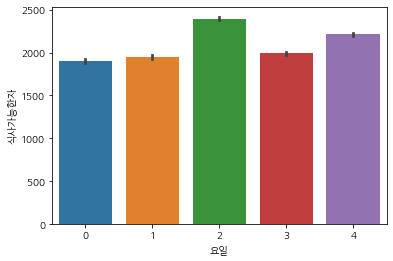

In [61]:
sns.barplot(data = train, x = "요일", y ="식사가능한자")

<AxesSubplot:xlabel='중식쌀밥외', ylabel='중식계'>

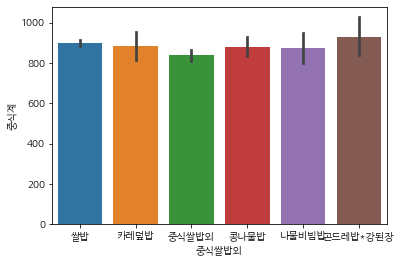

In [62]:
sns.barplot(data = train, x = "중식쌀밥외", y ="중식계")

<AxesSubplot:xlabel='중식쌀밥외', ylabel='식사가능한자'>

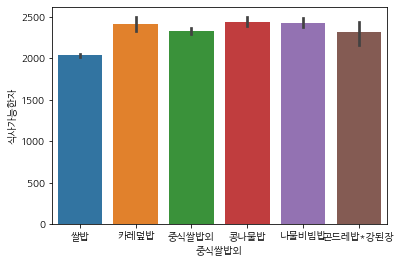

In [63]:
sns.barplot(data = train, x = "중식쌀밥외", y ="식사가능한자")

In [64]:
model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [1]:
# submission.to_csv('./235743_구내식당 식사 인원 예측 AI 경진대회_data/lunch.csv', index=False)